In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import NormalizingFlow as nf
from IPython.display import display, Latex
import corner
import numpy as np
import matplotlib.pyplot as plt
import lusee

In [4]:
args=nf.Args()
s,ll=nf.get_samplesAndLikelihood(args,plot='all')
nf.get_constraints(s,ll,)


{'amp': 1.0204081632653061,
 'amp+': 0.04081632653061229,
 'amp-': 0.03265306122448974,
 'width': 14.142857142857142,
 'width+': 0.16326530612244916,
 'width-': 0.08163265306122369,
 'numin': 16.29795918367347,
 'numin+': 0.12244897959183731,
 'numin-': 0.12244897959183731,
 'amp+-': 0.13877551020408152,
 'width+-': 0.44897959183673564,
 'numin+-': 0.408163265306122}

In [5]:
def get_constraints_latex(args):
    s,ll=nf.get_samplesAndLikelihood(args,plot='all')
    constraints=nf.get_constraints(s,ll)
    constraints['amp']*=40.0
    constraints['amp+']*=40.0
    constraints['amp-']*=40.0
    out=dict()
    for p in ['amp','width','numin']:
        out[p]=f"${constraints[p]:.3f}^{{+{constraints[p+'+']:.3f}}}_{{-{constraints[p+'-']:.3f}}}$"
    return out

def get_latex_table(args):
    latexdict=get_constraints_latex(args)
    out=''
    for p in ['amp','width','numin']:
        out=out+' & '+latexdict[p]
    return out

In [6]:
for k,v in get_constraints_latex(args).items():
    display(Latex(f"{k}: {v}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 & $44.648^{+15.627}_{-13.394}$ & $15.071^{+0.850}_{-0.708}$ & $16.278^{+0.490}_{-0.571}$


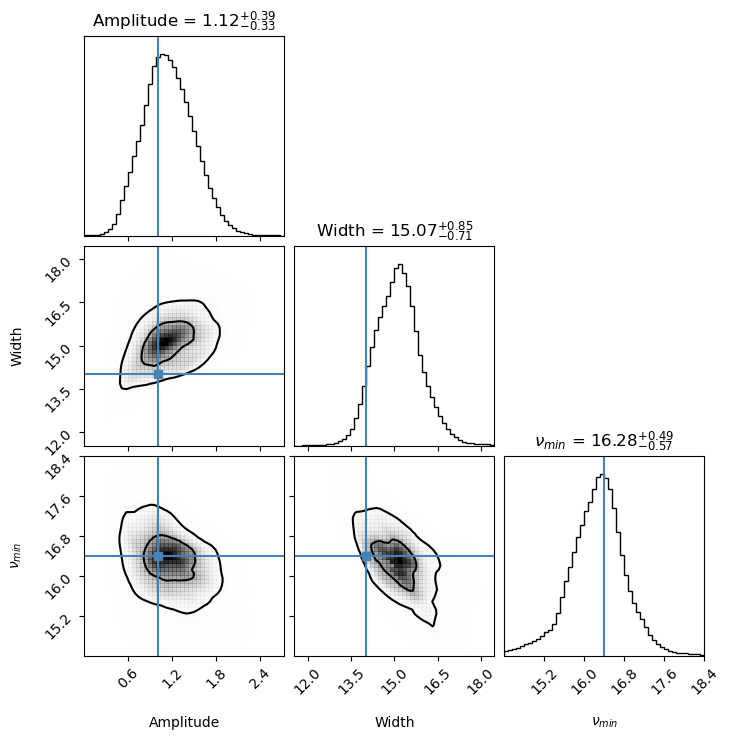

Text(0.5, 1.0, 'Amplitude 95% confidence: <57.769 mK')

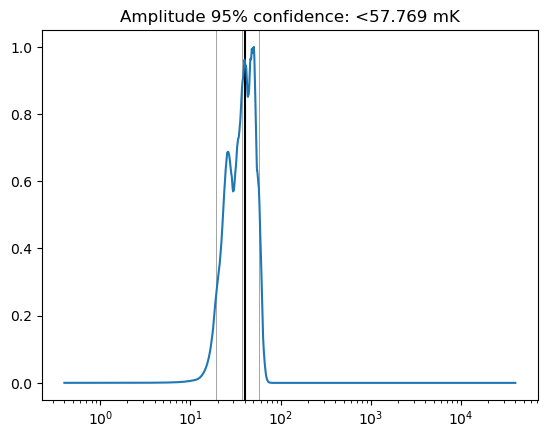

In [19]:
args=nf.Args()
args.noise=0.0001
args.sigma=2.0
args.chromatic=False
args.combineSigma='4'
args.append='_t21zeros'

# args.freqFluctuationLevel=0.05
# args.gainFluctuationLevel=0.05
# args.gFdebug=3

print(get_latex_table(args))

s,ll=nf.get_samplesAndLikelihood(args,plot='all')
corner.corner(s,weights=nf.exp(ll),labels=['Amplitude','Width',r'$\nu_{min}$'], 
             bins=50, truths=[1.0,14.0,16.4],
             verbose=True, plot_datapoints=False, show_titles=True,
             levels=[1-np.exp(-0.5),1-np.exp(-2)])
plt.show()

s,ll=nf.get_samplesAndLikelihood(args,plot='A')
quantiles=corner.core.quantile(s[:,0],[0.05,0.5,0.95],weights=nf.exp(ll))
for x in quantiles:
    plt.axvline(40*x,c='k',alpha=0.5,lw=0.5)
plt.axvline(40,color='k')
plt.plot(40*s,nf.exp(ll))
plt.xscale('log')
# plt.xlim(10,2e3)
plt.title(f'Amplitude 95% confidence: <{40*quantiles[-1]:.3f} mK')

# 95% confidence amplitude

Text(0.5, 1.0, 'Amplitude 95% confidence: <3.497 mK')

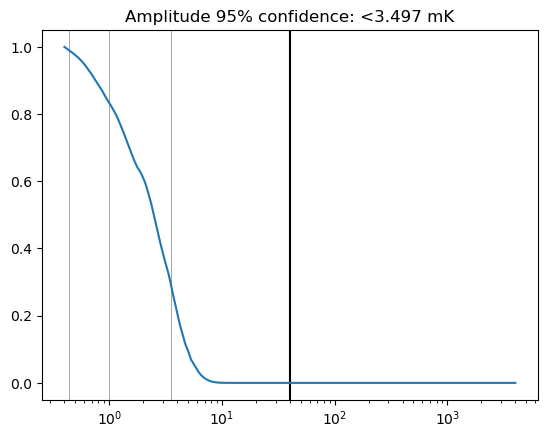

In [25]:
args=nf.Args()
# args.noise=0.1
# args.chromatic=False
# args.combineSigma=''
args.append='_gFmapv2'
args.gainFluctuationLevel=1.0

s,ll=nf.get_samplesAndLikelihood(args,plot='A')
quantiles=corner.core.quantile(s[:,0],[0.05,0.5,0.95],weights=nf.exp(ll))
for x in quantiles:
    plt.axvline(40*x,c='k',alpha=0.5,lw=0.5)
plt.axvline(40,color='k')
plt.plot(40*s,nf.exp(ll))
plt.xscale('log')
# plt.xlim(10,2e3)
plt.title(f'Amplitude 95% confidence: <{40*quantiles[-1]:.3f} mK')

Amplitude 1.661 +3.246 -1.160, <7.728
Amplitude 3.030 +3.246 -1.160, <7.728
 & $1.661^{+3.246}_{-1.160}$ & $<7.728$


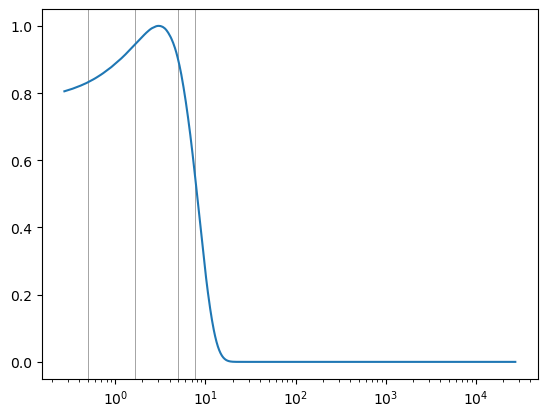

In [16]:
args=nf.Args()
args.noise=1.0
args.chromatic=True
args.combineSigma='4 6'
args.append='_tcmb'

s,ll=nf.get_samplesAndLikelihood(args,plot='A')
quantiles=corner.core.quantile(s[:,0],[0.16,0.5,0.84,0.95],weights=nf.exp(ll))
dqm=quantiles[1]-quantiles[0]
dqp=quantiles[2]-quantiles[1]

maxll=s[np.argmax(ll),0]
for x in quantiles:
    plt.axvline(2.725*x,c='k',alpha=0.5,lw=0.5)
# plt.axvline(40,color='k')
plt.plot(2.725*s,nf.exp(ll))
plt.xscale('log')
# plt.xlim(3e3,5e3)
print('Amplitude {:.3f} +{:.3f} -{:.3f}, <{:.3f}'.format(2.725*quantiles[1],2.725*dqp,2.725*dqm,2.725*quantiles[-1]))
print('Amplitude {:.3f} +{:.3f} -{:.3f}, <{:.3f}'.format(2.725*maxll,2.725*dqp,2.725*dqm,2.725*quantiles[-1]))

print(f" & ${2.725*quantiles[1]:.3f}^{{+{2.725*dqp:.3f}}}_{{-{2.725*dqm:.3f}}}$ & $<{2.725*quantiles[-1]:.3f}$")
plt.show()

In [42]:
nf.exp(ll)[nf.exp(ll)!=0]

array([2.76173803e-318, 4.11940449e-311, 6.08144514e-304, 9.72234629e-297,
       1.83029774e-289, 2.92858031e-282, 4.34831676e-275, 6.84885074e-268,
       1.06376102e-260, 1.75836010e-253, 2.64802167e-246, 2.85501342e-239,
       2.71019593e-232, 2.51834771e-225, 2.71752416e-218, 2.45884564e-211,
       2.09421107e-204, 1.78386773e-197, 1.38344925e-190, 8.50220367e-184,
       3.79885314e-177, 1.74233577e-170, 7.45519877e-164, 2.24929260e-157,
       6.24134244e-151, 1.43321434e-144, 4.54701698e-138, 9.70963379e-132,
       1.62865752e-125, 1.75399133e-119, 1.81721484e-113, 1.44785307e-107,
       8.96645670e-102, 6.88539253e-096, 3.63947552e-090, 1.51631900e-084,
       3.03022452e-079, 6.79098844e-074, 8.84360283e-069, 8.59048854e-064,
       6.49631694e-059, 4.82794135e-054, 2.03459830e-049, 4.07155920e-045,
       8.42356439e-041, 1.23489735e-036, 5.02359420e-033, 2.09665979e-029,
       5.78145835e-026, 8.03672983e-023, 9.46717645e-020, 5.84845258e-017,
       1.78186419e-014, 4

In [47]:
ll.max()

-55.619972229003906

# Fix combineSigma t21 template

In [1]:
args=nf.Args()
args.noise=0.0
args.sigma=2.0
args.chromatic=False
args.combineSigma='4 6'
args.append='_t21zeros'

# args.freqFluctuationLevel=0.05
args.gainFluctuationLevel=1.0
# args.gFdebug=3
print(get_latex_table(args))

s,ll=nf.get_samplesAndLikelihood(args,plot='all')
corner.corner(s,weights=nf.exp(ll),labels=['Amplitude','Width',r'$\nu_{min}$'], 
             bins=50, truths=[1.0,14.0,16.4],
             verbose=True, plot_datapoints=False, show_titles=True,
             levels=[1-np.exp(-0.5),1-np.exp(-2)])
plt.show()

s,ll=nf.get_samplesAndLikelihood(args,plot='A')
quantiles=corner.core.quantile(s[:,0],[0.05,0.5,0.95],weights=nf.exp(ll))
for x in quantiles:
    plt.axvline(40*x,c='k',alpha=0.5,lw=0.5)
plt.axvline(40,color='k')
plt.plot(40*s,nf.exp(ll))
plt.xscale('log')
# plt.xlim(10,2e3)
plt.title(f'Amplitude 95% confidence: <{40*quantiles[-1]:.3f} mK')

NameError: name 'nf' is not defined

In [79]:
flow=nf.FlowAnalyzerV2('')
args.diffCombineSigma=True
flow.set_fg(args)
freqs=np.arange(1,51)
t21=nf.T_DA(width=14,nu_min=16.4,amp=0.04)
flow.set_t21(t21, include_noise=args.noisyT21)

no file found, need to train
doing sigmas [2.0, 4.0]
smoothing with 2.0 deg, and chromatic False
smoothing with 4.0 deg, and chromatic False
self.fgsmooth.shape=(100, 196608)
doing diffCombineSigma for combineSigma
self.fgsmooth.shape=(100, 196608)
doing galcut for b_min=20.0 deg
self.fgss.shape=(100, 1984)
self.data.shape=(1984, 100) self.fgmeansdata.shape=(100,) self.eve.shape=(100, 100)
using modes between 
[]
self.data.shape=(1984, 100) self.fgmeansdata.shape=(100,) self.eve.shape=(100, 100)
done! self.train_data.shape=(1587, 100),self.validate_data.shape=(397, 100) ready
self.t21data.shape=(100,) ready


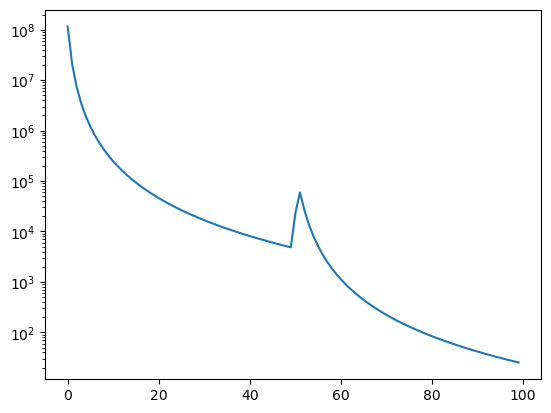

In [80]:
plt.plot(flow.fgmeans_ss)
plt.yscale('log')

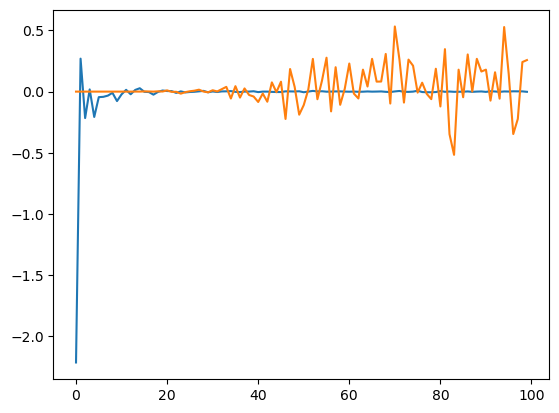

In [81]:
plt.plot(flow.fgmeansdata)
plt.plot(flow.t21data)